# Simple Linear Regression

## Data Dictionary:

### `FuelConsumption.csv`:

`FuelConsumption.csv` contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada.

Columns:

*   **MODELYEAR** e.g. 2014
*   **MAKE** e.g. Acura
*   **MODEL** e.g. ILX
*   **VEHICLE CLASS** e.g. SUV
*   **ENGINE SIZE** e.g. 4.7
*   **CYLINDERS** e.g 6
*   **TRANSMISSION** e.g. A6
*   **FUEL CONSUMPTION in CITY(L/100 km)** e.g. 9.9
*   **FUEL CONSUMPTION in HWY (L/100 km)** e.g. 8.9
*   **FUEL CONSUMPTION COMB (L/100 km)** e.g. 9.2
*   **CO2 EMISSIONS (g/km)** e.g. 182   --> low --> 0

In [1]:
# Import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
# Load data
df = pd.read_csv("FuelConsumptionCo2.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


# EDA:

In [3]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [4]:
# Select Features to explore
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244
5,3.5,6,10.0,230
6,3.5,6,10.1,232
7,3.7,6,11.1,255
8,3.7,6,11.6,267


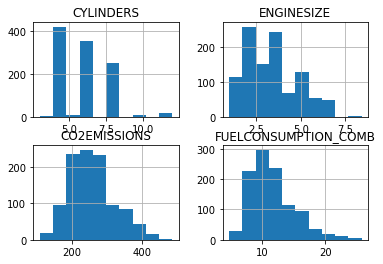

In [5]:
# Plot features as histogram
viz = cdf[['CYLINDERS','ENGINESIZE','CO2EMISSIONS','FUELCONSUMPTION_COMB']]
viz.hist()
plt.show()

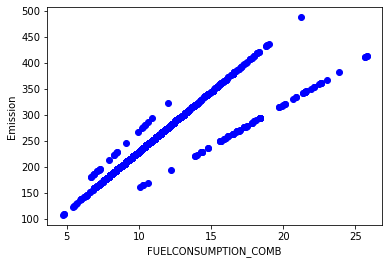

In [6]:
# Create Scatter plots and explore linear relationships
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

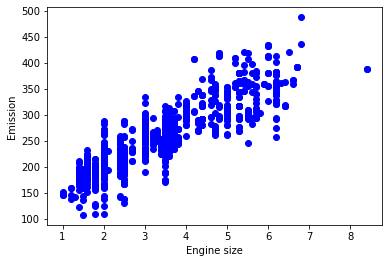

In [7]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

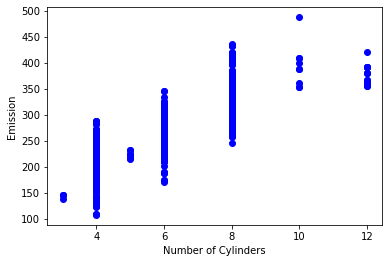

In [8]:
# Plot Cylinder against Co2 Emissions
plt.scatter(cdf.CYLINDERS, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Number of Cylinders")
plt.ylabel("Emission")
plt.show()



In [9]:
# Create mask to split test/train data: 80% for training, 20% for testing
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]
print(msk)

[ True  True  True ...  True  True  True]


### Simple Regression Model:

#### Visualize training data distribution


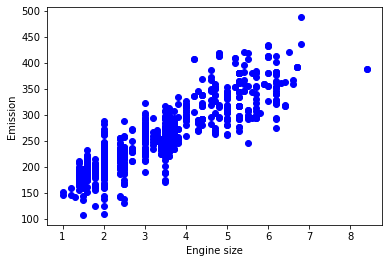

In [10]:
# Create scater plot to ensure random distribution of training data
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.show()

### Create Regression Model

In [11]:
# Import linear_model from sklearn
from sklearn import linear_model

# Create regression model
regr = linear_model.LinearRegression()

# Train and fit data
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

# Print and check Coefficients and Intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[39.31937032]]
Intercept:  [125.60508111]


### Create Line of Best Fit:

Text(0, 0.5, 'Emission')

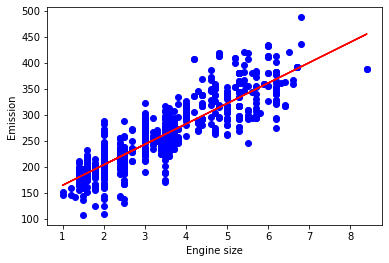

In [12]:
# Create scatter plot as before
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

#Create regression line with equation Y = mX + b
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

### Evaluate Model:

In [13]:
# Import r^2 score package from sklearn
from sklearn.metrics import r2_score

# Test model and evaluate using MSE and R^2
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

# Predict y test data
test_y_ = regr.predict(test_x)

# Print evaluation results
print("(MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )

(MSE): 900.62
R2-score: 0.76


<b>Large MSE and a fair R^2-score.<br>
<br>
Re-train the model using independent variable 'FUELCONSUMPTION_COMB' and evaluate metrics</b>

In [19]:
# Pull new training and test data from FUELCONSUMPTION_COMB
train_x = train[["FUELCONSUMPTION_COMB"]]

test_x = test[["FUELCONSUMPTION_COMB"]]

In [28]:
# Train and fit model using new predictor
regr = linear_model.LinearRegression()
regr.fit(train_x, train_y)

# Print and check Coefficients and Intercept
print ('Coefficients: ', regr.coef_)
print ('Intercept: ', regr.intercept_)

Coefficients:  [[16.22745199]]
Intercept:  [68.69419946]


Text(0, 0.5, 'Fule Consumption')

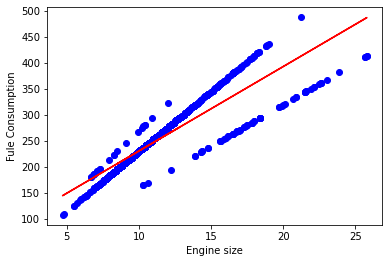

In [31]:
# Create scatter plot as before
plt.scatter(train_x, train_y,  color='blue')

# Create regression line with equation Y = mX + b
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Engine size")
plt.ylabel("Fule Consumption")

In [36]:
# Generate new predictions with new model
predictions = regr.predict(test_x)

# Print evaluation results
print("(MSE): %.2f" % np.mean(predictions - test_y) ** 2)
print("R2-score: %.2f" % r2_score(predictions, test_y) )

(MSE): 3.93
R2-score: 0.73


# Conclusion:
<br>
<b>Regression Model has a smaller MSE and a similair R^2 value. The large difference in MSE determines that the 2nd model, trained on Engine Size, is more accurate than the model trained on Fuel Consumption</b>